Official github: [StasBomb](https://github.com/statsbomb/statsbombpy)

# Step 0: Install the needed libraries

In [141]:
import subprocess
import sys

# List of required packages
required_packages = [
    "pandas", "numpy", "matplotlib", "seaborn", "networkx"
]

def install_package(package):
    """Installs a package using pip if it's not already installed."""
    try:
        __import__(package)
        print(f"{package} is already installed.")
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Check and install missing packages
for package in required_packages:
    install_package(package)


pandas is already installed.
numpy is already installed.
matplotlib is already installed.
seaborn is already installed.
networkx is already installed.


In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import random

from matplotlib.patches import Arc

# Step 1: Install StasBomb Data Library

StatsBomb provides a rich, event-based dataset for football analytics. It includes detailed match event data such as passes, shots, tackles, dribbles, defensive actions, and pressures, with precise spatio-temporal information (x, y coordinates). The 
key Features of StatsBomb Data Library are:

 - Pass Data → Pass origin, destination, type, and success/failure.
 - Shot Data → Shot location, expected goals (xG), outcome (goal, miss, block).
 - Defensive Actions → Tackles, interceptions, pressing intensity.
 - Possession & Transition Data → Who has the ball, where, and under what conditions.

The dataset covers multiple leagues and competitions, including:

 - La Liga
 - Premier League
 - World Cup
 - UEFA Champions League

By using StatsBomb Open Data, we can analyze team formations, player tendencies, and tactical setups in a data-driven way.


In [142]:
install_package("statsbombpy")

statsbombpy is already installed.


In [113]:
from statsbombpy import sb

# Step 2: Load Available Competitions from StatsBomb

In [114]:
# Suppress the authentication warning
import warnings
from statsbombpy.api_client import NoAuthWarning
warnings.simplefilter("ignore", NoAuthWarning)

Let's retrieve all available competitions from the library, orders them by season (from oldest to latest) and diplays them

In [115]:
# Load competitions
competitions = sb.competitions()

# Convert 'season_name' to integer for proper sorting
competitions['season_year'] = competitions['season_name'].str[:4].astype(int)

# Order by season (oldest first)
competitions = competitions.sort_values(by='season_year', ascending=True)

# Count competitions per year
competition_counts = competitions['season_year'].value_counts().sort_index(ascending=False)

# Display competitions in an ordered format
print("Available Competitions in StatsBomb Open Data (Ordered by Year):\n")
for _, row in competitions.iterrows():
    print(f"{row['season_name']} | {row['competition_name']} ({row['competition_gender'].capitalize()})")

# Show the sorted DataFrame for reference
display(competitions)

Available Competitions in StatsBomb Open Data (Ordered by Year):

1958 | FIFA World Cup (Male)
1962 | FIFA World Cup (Male)
1970 | FIFA World Cup (Male)
1970/1971 | Champions League (Male)
1971/1972 | Champions League (Male)
1972/1973 | Champions League (Male)
1973/1974 | La Liga (Male)
1974 | FIFA World Cup (Male)
1977 | North American League (Male)
1977/1978 | Copa del Rey (Male)
1979 | FIFA U20 World Cup (Male)
1981 | Liga Profesional (Male)
1982/1983 | Copa del Rey (Male)
1983/1984 | Copa del Rey (Male)
1986/1987 | Serie A (Male)
1986 | FIFA World Cup (Male)
1988/1989 | UEFA Europa League (Male)
1990 | FIFA World Cup (Male)
1997/1998 | Liga Profesional (Male)
1999/2000 | Champions League (Male)
2003/2004 | Premier League (Male)
2003/2004 | Champions League (Male)
2004/2005 | Champions League (Male)
2004/2005 | La Liga (Male)
2005/2006 | La Liga (Male)
2006/2007 | Champions League (Male)
2006/2007 | La Liga (Male)
2007/2008 | La Liga (Male)
2008/2009 | Champions League (Male)
2008/2

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available,season_year
36,43,269,International,FIFA World Cup,male,False,True,1958,2024-02-13T14:22:08.222297,None,None,2024-02-13T14:22:08.222297,1958
35,43,270,International,FIFA World Cup,male,False,True,1962,2023-06-26T10:38:00.323984,None,None,2023-06-26T10:38:00.323984,1962
34,43,272,International,FIFA World Cup,male,False,True,1970,2024-02-13T14:23:06.735299,None,None,2024-02-13T14:23:06.735299,1970
20,16,276,Europe,Champions League,male,False,False,1970/1971,2024-02-13T14:24:12.213582,None,None,2024-02-13T14:24:12.213582,1970
19,16,71,Europe,Champions League,male,False,False,1971/1972,2024-02-12T14:25:01.735880,2021-06-13T16:17:31.694,None,2024-02-12T14:25:01.735880,1971
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596,2023
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825,2023
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676,2023
21,223,282,South America,Copa America,male,False,True,2024,2024-07-15T18:00:33.653673,None,None,2024-07-15T18:00:33.653673,2024


## Step 2.1: Print all the Matches in the Dataset

Let's print all the matches contained in the dataset in chronological order

In [116]:
# Load all competitions
comps = sb.competitions()

# Extract the numeric year from 'season_name' (e.g. "2023/2024" -> 2023)
comps['season_year'] = comps['season_name'].str[:4].astype(int)

# Sort competition ascending by'season_year'
comps_sorted = comps.sort_values(by='season_year', ascending=True).reset_index(drop=True)

all_matches_list = []
total_matches = 0

# Iterate over competitions in chronological order
for idx, row in comps_sorted.iterrows():
    cid = row['competition_id']
    sid = row['season_id']
    comp_name = row['competition_name']
    season_name = row['season_name']
    season_year = row['season_year']
    
    # Load matches for the competition + season
    comp_matches = sb.matches(competition_id=cid, season_id=sid)
    
    # Sort by match_date ascending
    comp_matches = comp_matches.sort_values(by='match_date', ascending=True)
    
    # Print matches in chronological order
    print(40*"=")
    print(f"{season_year} | {comp_name} ({season_name})\n")
    match_count = 0
    for m_idx, m_row in comp_matches.iterrows():
        match_date = m_row['match_date']
        home_team  = m_row['home_team']
        away_team  = m_row['away_team']
        home_score = m_row['home_score']
        away_score = m_row['away_score']
        
        # Print each match line: date, home vs away, final score
        print(f"{match_date} | {home_team} - {away_team} {home_score}:{away_score}")
        match_count += 1

    # Print the total number of matches for this competition + season
    print(f"\nTotal matches for this competition: {match_count}")
    
    # Accumulate into an overall total and list
    total_matches += match_count
    all_matches_list.append(comp_matches)

# This will create a single DataFrame with all matches
all_matches = pd.concat(all_matches_list, ignore_index=True)

# Print the grand total of matches across all competitions/seasons
print("\n-------------------------------------------")
print(f"Grand total across all comps/seasons: {total_matches} matches")

1958 | FIFA World Cup (1958)

1958-06-24 | Brazil - France 5:2
1958-06-29 | Brazil - Sweden 5:2

Total matches for this competition: 2
1962 | FIFA World Cup (1962)

1962-05-30 | Brazil - Mexico 2:0

Total matches for this competition: 1
1970 | FIFA World Cup (1970)

1970-06-04 | Brazil - Czechoslovakia 4:1
1970-06-07 | Brazil - England 1:0
1970-06-10 | Brazil - Romania 3:2
1970-06-14 | Brazil - Peru 4:2
1970-06-18 | Brazil - Uruguay 3:1
1970-06-21 | Brazil - Italy 4:1

Total matches for this competition: 6
1970 | Champions League (1970/1971)

1971-06-02 | Ajax - Panathinaikos 2:0

Total matches for this competition: 1
1971 | Champions League (1971/1972)

1972-05-31 | Ajax - Inter Milan 2:0

Total matches for this competition: 1
1972 | Champions League (1972/1973)

1973-05-30 | Ajax - Juventus 1:0

Total matches for this competition: 1
1973 | La Liga (1973/1974)

1974-02-17 | Real Madrid - Barcelona 0:5

Total matches for this competition: 1
1974 | FIFA World Cup (1974)

1974-06-19 | Ne

In [117]:
all_matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3888704,1958-06-24,21:00:00.000,International - FIFA World Cup,1958,Brazil,France,5,2,available,...,None,6,Semi-finals,Friends Arena,Mervyn Griffiths,Vicente Ítalo Feola,Albert Batteux,1.1.0,2,2
1,3888705,1958-06-29,17:00:00.000,International - FIFA World Cup,1958,Brazil,Sweden,5,2,available,...,None,7,Final,Friends Arena,Maurice Guigue,Vicente Ítalo Feola,George Raynor,1.1.0,2,2
2,3888854,1962-05-30,21:00:00.000,International - FIFA World Cup,1962,Brazil,Mexico,2,0,available,...,None,1,Group Stage,Estadio Sausalito,NaN,Aymoré Moreira,Ignacio Trelles,1.1.0,2,2
3,3888699,1970-06-04,01:00:00.000,International - FIFA World Cup,1970,Brazil,Czechoslovakia,4,1,available,...,None,1,Group Stage,Estadio Jalisco,Ramón Ivanoes Barreto Ruiz,Mário Jorge Lobo Zagallo,Jozef Marko,1.1.0,2,2
4,3888700,1970-06-07,21:00:00.000,International - FIFA World Cup,1970,Brazil,England,1,0,available,...,None,2,Group Stage,Estadio Jalisco,Abraham Klein,Mário Jorge Lobo Zagallo,Alfred Ernest Ramsey,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3428,3942227,2024-07-06,19:00:00.000,Europe - UEFA Euro,2024,England,Switzerland,1,1,available,...,2024-07-14T15:57:51.414762,5,Quarter-finals,Merkur Spiel-Arena,Daniele Orsato,Gareth Southgate,Murat Yakin,1.1.0,2,2
3429,3942382,2024-07-06,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,Turkey,2,1,available,...,2024-07-10T06:56:35.146850,5,Quarter-finals,Olympiastadion Berlin,Clément Turpin,Ronald Koeman,Vincenzo Montella,1.1.0,2,2
3430,3942752,2024-07-09,22:00:00.000,Europe - UEFA Euro,2024,Spain,France,2,1,available,...,2024-07-10T13:01:26.597509,6,Semi-finals,Allianz Arena,Slavko Vinčić,Luis de la Fuente Castillo,Didier Deschamps,1.1.0,2,2
3431,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,...,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2


# Step 3: Load Matches for a Specific Competition

Let's select a specific competition (e.g., La Liga 2020/21) and retrieve all the matches from that season. This is useful to explore match details, including:

- Match ID (needed to extract events later)
- Teams playing (home and away)
- Date of the match

In [140]:
# Select a competition (e.g., La Liga 2020/21)
competition_id = 11  # La Liga
season_id = 90       # 2020/21 season

# Load matches for the selected competition
matches = sb.matches(competition_id=competition_id, season_id=season_id)

# Display useful match information
print(f"Matches for La Liga 2020/21 (Competition ID: {competition_id}, Season ID: {season_id})\n")

# Print formatted match list
for _, row in matches.iterrows():
    print(f"{row['match_date']} | {row['home_team']} vs {row['away_team']}")


Matches for La Liga 2020/21 (Competition ID: 11, Season ID: 90)

2020-10-31 | Deportivo Alavés vs Barcelona
2021-01-09 | Granada vs Barcelona
2021-05-16 | Barcelona vs Celta Vigo
2021-02-07 | Real Betis vs Barcelona
2021-03-06 | Osasuna vs Barcelona
2021-04-10 | Real Madrid vs Barcelona
2020-12-13 | Barcelona vs Levante UD
2020-09-27 | Barcelona vs Villarreal
2020-10-01 | Celta Vigo vs Barcelona
2020-10-24 | Barcelona vs Real Madrid
2021-01-03 | Huesca vs Barcelona
2020-10-04 | Barcelona vs Sevilla
2020-10-17 | Getafe vs Barcelona
2020-11-21 | Atlético Madrid vs Barcelona
2020-12-19 | Barcelona vs Valencia
2021-04-29 | Barcelona vs Granada
2021-05-08 | Barcelona vs Atlético Madrid
2021-05-11 | Levante UD vs Barcelona
2021-05-02 | Valencia vs Barcelona
2021-03-15 | Barcelona vs Huesca
2021-04-22 | Barcelona vs Getafe
2021-03-21 | Real Sociedad vs Barcelona
2020-12-16 | Barcelona vs Real Sociedad
2020-12-22 | Real Valladolid vs Barcelona
2020-12-05 | Cádiz vs Barcelona
2021-01-06 | Athle

# Step 4: Select a Specific Match and Load Event Data

Let's select a specific game and load the data of that event. For example, let's find both matches between Barcelona and Real Madrid in La Liga 2020/21, also known as El Clásico.

We will display both:

- First Leg: First match of the season between the two teams.
- Second Leg: Return match later in the season.

In [144]:
# Filter for Barcelona vs Real Madrid (both home & away games)
clasico_matches = matches[
    ((matches["home_team"] == "Barcelona") & (matches["away_team"] == "Real Madrid")) |
    ((matches["home_team"] == "Real Madrid") & (matches["away_team"] == "Barcelona"))
]

# Ensure that two matches are found
if clasico_matches.shape[0] < 2:
    print("Not enough matches found for Barcelona vs Real Madrid in this dataset.")
else:
    # Sort matches by date 
    clasico_matches = clasico_matches.sort_values(by="match_date")

    # First match
    match_id_1 = clasico_matches.iloc[0]["match_id"]
    home_team_1 = clasico_matches.iloc[0]["home_team"]
    away_team_1 = clasico_matches.iloc[0]["away_team"]
    match_date_1 = clasico_matches.iloc[0]["match_date"]
    home_score_1 = clasico_matches.iloc[0]["home_score"]
    away_score_1 = clasico_matches.iloc[0]["away_score"]

    # Second match
    match_id_2 = clasico_matches.iloc[1]["match_id"]
    home_team_2 = clasico_matches.iloc[1]["home_team"]
    away_team_2 = clasico_matches.iloc[1]["away_team"]
    match_date_2 = clasico_matches.iloc[1]["match_date"]
    home_score_2 = clasico_matches.iloc[1]["home_score"]
    away_score_2 = clasico_matches.iloc[1]["away_score"]

    # Print both matches
    print(f"El Clásico Matches in La Liga 2020/21:\n")
    print(f"[ID: {match_id_1}] {match_date_1} | {home_team_1} - {away_team_1} {home_score_1}:{away_score_1}")
    print(f"[ID: {match_id_2}] {match_date_2} | {home_team_2} - {away_team_2} {home_score_2}:{away_score_2}")


El Clásico Matches in La Liga 2020/21:

[ID: 3773585] 2020-10-24 | Barcelona - Real Madrid 1:3
[ID: 3773497] 2021-04-10 | Real Madrid - Barcelona 2:1


# Step 5: Analyze Team Shape and Average Player Positions

We will calculate and visualize:

- The average position of each player during the match
- How the team shape evolves by dividing the match into halves
- Compare the positioning of both teams

In [120]:
# Load events for the first El Clásico match
events = sb.events(match_id=match_id_1) # you can also use match_id_2

# "Starting XI" rows for each team
home_team = events.loc[events['type'] == 'Starting XI', 'team'].unique()[0]
away_team = events.loc[events['type'] == 'Starting XI', 'team'].unique()[1]

print("Home Team:", home_team)
print("Away Team:", away_team)

Home Team: Barcelona
Away Team: Real Madrid


In [121]:
# Extract the Starting XI for each team and build a map of player names to jersey numbers
def build_xi_jersey_map(events_df, team_name):
    """
    Returns a dict mapping:
       "Lionel Andrés Messi Cuccittini" -> 10,
       "Frenkie de Jong" -> 21, 
       etc...
    for that team's Starting XI.
    """
    row = events_df[
        (events_df['type'] == 'Starting XI') &
        (events_df['team'] == team_name)
    ].iloc[0]
    
    lineup = row['tactics']['lineup']
    
    jersey_map = {}
    for pl in lineup:
        player_dict = pl.get('player', {})
        full_name   = player_dict.get('name', "Unknown_Player")
        jersey_num  = pl.get('jersey_number', None)
        
        # e.g., "Lionel Andrés Messi Cuccittini": 10
        jersey_map[full_name] = jersey_num
    
    return jersey_map


home_jersey_map = build_xi_jersey_map(events, home_team)
away_jersey_map = build_xi_jersey_map(events, away_team)

print("Home XI jersey map:\n", home_jersey_map)
print("\nAway XI jersey map:\n", away_jersey_map)


Home XI jersey map:
 {'Norberto Murara Neto': 13, 'Sergino Dest': 2, 'Gerard Piqué Bernabéu': 3, 'Clément Lenglet': 15, 'Jordi Alba Ramos': 18, 'Sergio Busquets i Burgos': 5, 'Frenkie de Jong': 21, 'Pedro González López': 16, 'Philippe Coutinho Correia': 14, 'Anssumane Fati': 22, 'Lionel Andrés Messi Cuccittini': 10}

Away XI jersey map:
 {'Thibaut Courtois': 1, 'José Ignacio Fernández Iglesias': 6, 'Raphaël Varane': 5, 'Sergio Ramos García': 4, 'Ferland Mendy': 23, 'Carlos Henrique Casimiro': 14, 'Federico Santiago Valverde Dipetta': 15, 'Toni Kroos': 8, 'Marco Asensio Willemsen': 11, 'Vinícius José Paixão de Oliveira Júnior': 20, 'Karim Benzema': 9}


In [122]:
# Filter events to only include the Starting XI players

all_starters = set(home_jersey_map.keys()).union(away_jersey_map.keys())

events_starters = events[events['player'].isin(all_starters)].copy()

def get_jersey_number(player_name):
    if player_name in home_jersey_map:
        return home_jersey_map[player_name]
    elif player_name in away_jersey_map:
        return away_jersey_map[player_name]
    else:
        return None

events_starters['jersey_number'] = events_starters['player'].apply(get_jersey_number)

print("Original events shape:", events.shape[0])
print("Filtered (starters only) shape:", events_starters.shape[0])


Original events shape: 4213
Filtered (starters only) shape: 3924


In [123]:
# Compute average positions for each player

def compute_average_positions(df):
    """
    Group by (player, jersey_number), average their 'location'.
    Return columns: [player, jersey_number, x, y].
    """
    d = df.dropna(subset=['location']).copy()
    
    d['x'] = d['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else np.nan)
    d['y'] = d['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else np.nan)
    
    avg_positions = (
        d.groupby(['player','jersey_number'], as_index=False)
         .agg({'x':'mean','y':'mean'})
    )
    return avg_positions

home_events = events_starters[events_starters['team'] == home_team]
away_events = events_starters[events_starters['team'] == away_team]

home_avg_positions = compute_average_positions(home_events)
away_avg_positions = compute_average_positions(away_events)

home_avg_positions


,player,jersey_number,x,y
0,Anssumane Fati,22,77.830275,39.996330
1,Clément Lenglet,15,38.922051,22.309744
2,Frenkie de Jong,21,62.520168,21.523109
3,Gerard Piqué Bernabéu,3,38.354167,49.375000
4,Jordi Alba Ramos,18,69.016749,11.050739
5,Lionel Andrés Messi Cuccittini,10,74.355185,39.164815
6,Norberto Murara Neto,13,8.526415,39.360377
7,Pedro González López,16,68.355844,59.520130
8,Philippe Coutinho Correia,14,73.484810,25.563291
9,Sergino Dest,2,62.950777,67.466321


In [124]:
# function to dwaw the pitch 120x80
def draw_pitch(ax=None):
    """
    Draw a 120 x 80 pitch on the given Axes.
    (0,0) is top-left, (120,80) is bottom-right.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
    
    # Set pitch background
    ax.set_facecolor("green")
    
    # Outer boundaries
    ax.plot([0,0],[0,80], color="white")
    ax.plot([120,120],[0,80], color="white")
    ax.plot([0,120],[0,0], color="white")
    ax.plot([0,120],[80,80], color="white")
    
    # Center line
    ax.plot([60,60],[0,80], color="white")
    
    # Center circle
    center_circle = plt.Circle((60, 40), 10, color="white", fill=False)
    ax.add_patch(center_circle)
    
    # Penalty areas
    # Left penalty area
    ax.plot([0,18],[18,18], color="white")
    ax.plot([18,18],[18,62], color="white")
    ax.plot([0,18],[62,62], color="white")
    
    # Left goal area
    ax.plot([0,6],[30,30], color="white")
    ax.plot([6,6],[30,50], color="white")
    ax.plot([0,6],[50,50], color="white")
    
    # Right penalty area
    ax.plot([120,102],[18,18], color="white")
    ax.plot([102,102],[18,62], color="white")
    ax.plot([120,102],[62,62], color="white")
    
    # Right goal area
    ax.plot([120,114],[30,30], color="white")
    ax.plot([114,114],[30,50], color="white")
    ax.plot([120,114],[50,50], color="white")
    
    # Penalty spots
    ax.plot([12],[40], marker='o', markersize=3, color="white")
    ax.plot([108],[40], marker='o', markersize=3, color="white")
    
    # Left penalty arc (center = (12,40), radius = 10)
    # We'll tweak theta1/theta2 so it shows the “outside” half of the circle.
    left_arc = Arc(
        (12, 40),              # center x,y
        20, 20,                # width and height of the full ellipse (diameter=20)
        angle=0,               # rotation of the ellipse (0 means not rotated)
        theta1=310,            # start angle in degrees
        theta2=50,             # end angle in degrees
        color="white",
        lw=1.5
    )
    ax.add_patch(left_arc)
    
    # Right penalty arc (center = (108,40))
    right_arc = Arc(
        (108, 40), 
        20, 20,
        angle=0,
        theta1=130,
        theta2=230,
        color="white",
        lw=1.5
    )
    ax.add_patch(right_arc)
    
    # Flip y-axis so top=0
    ax.set_xlim(0,120)
    ax.set_ylim(80,0)
    
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    return ax

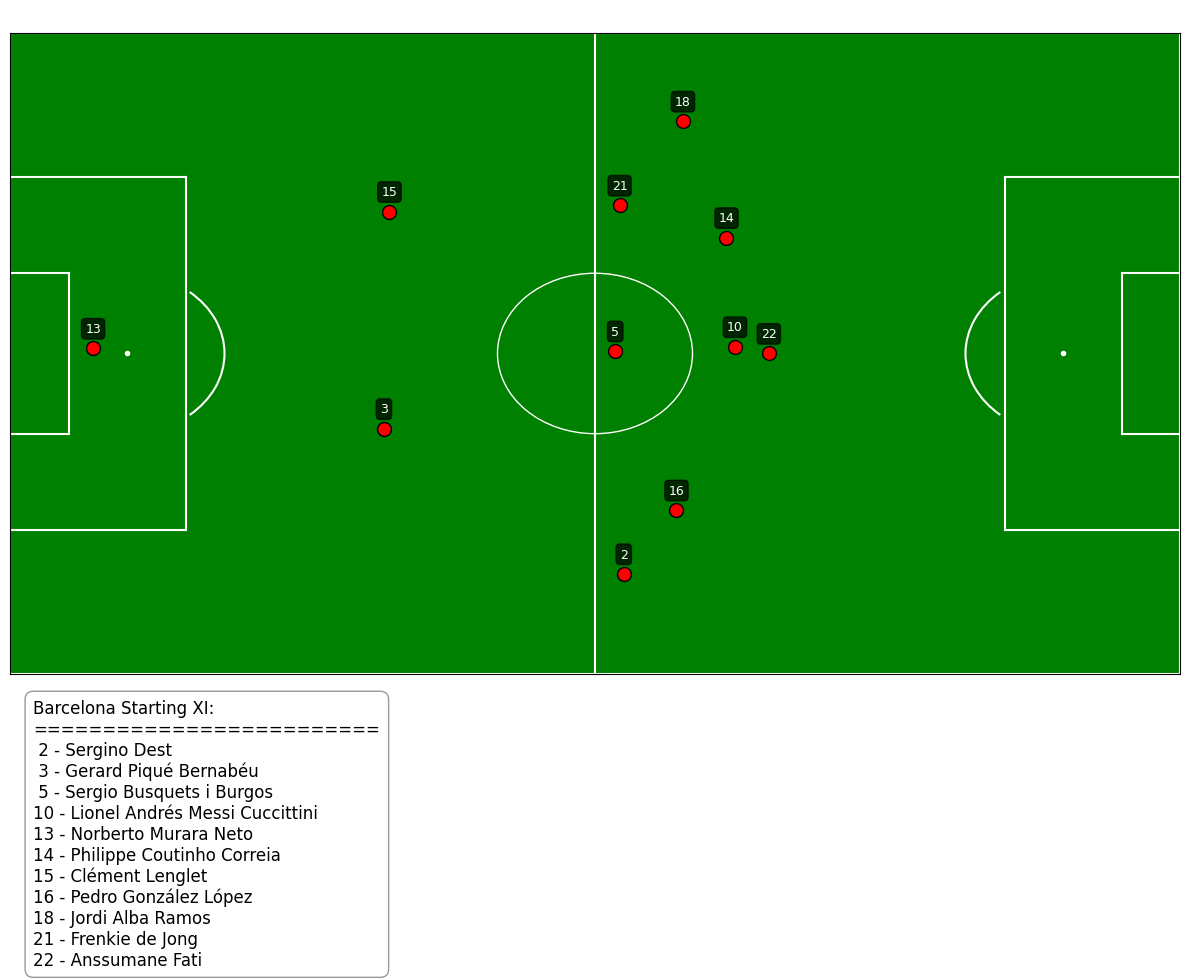

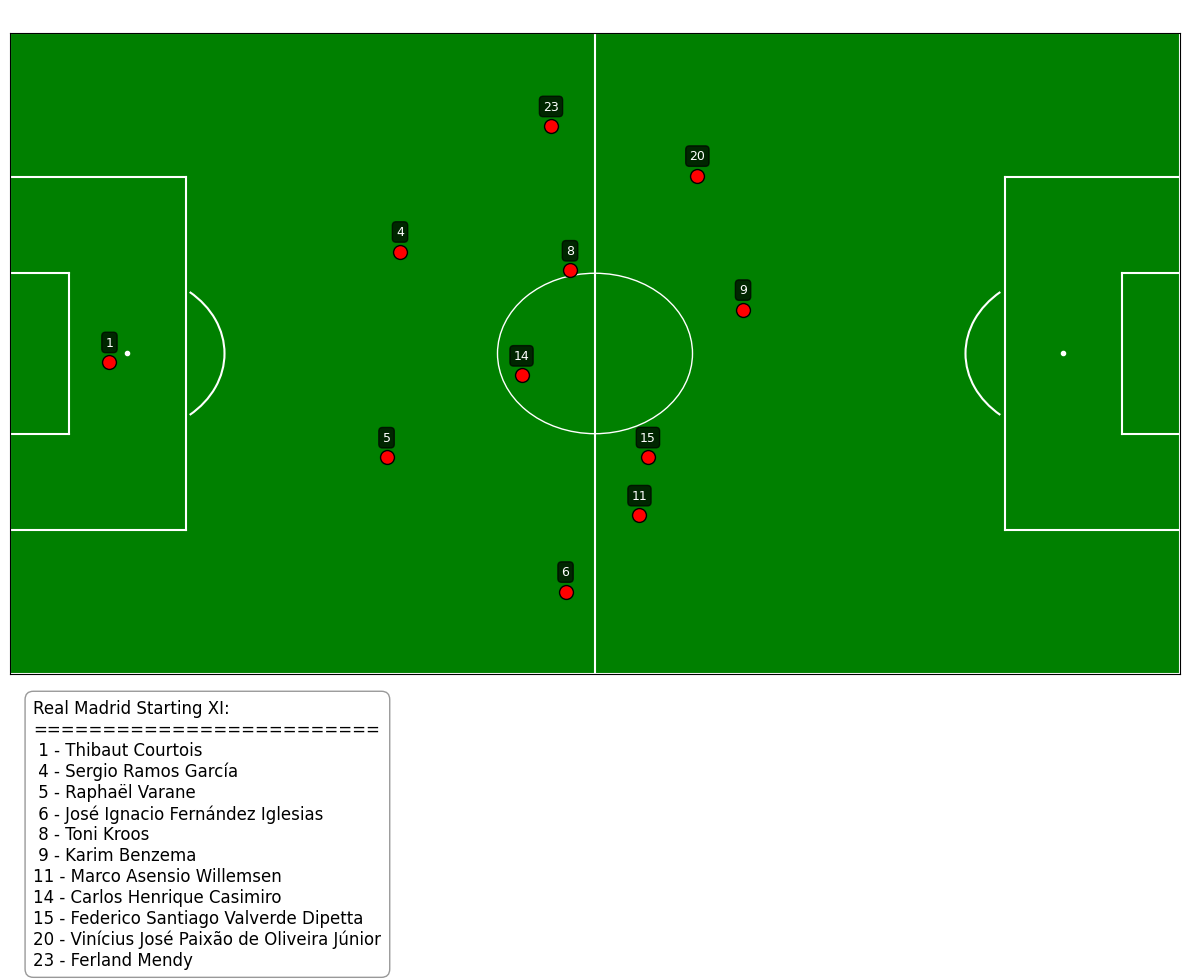

In [125]:
# Define a function to plot average positions
def plot_team_with_lineup(avg_positions_df, team_name, jersey_map):
    """
    Creates one figure with:
      - Top: a pitch, points for each player's avg x,y labeled by jersey only
      - Bottom: a textual listing of the lineup, # -> name
    """
    # We'll create a 2-row layout: top is pitch, bottom is text
    fig = plt.figure(figsize=(12,10))
    gs = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[4,1])
    
    # -- TOP: PITCH --
    ax_pitch = fig.add_subplot(gs[0,0])
    draw_pitch(ax=ax_pitch)
    ax_pitch.set_title(f"{team_name} - Average On-Ball Positions (Starters)", color="white", fontsize=14)
    
    # Plot the positions
    ax_pitch.scatter(avg_positions_df['x'], avg_positions_df['y'],
                     s=100, c='red', edgecolors='black', linewidths=1.0)
    
    # Label each dot with the jersey number
    for _, row in avg_positions_df.iterrows():
        num_str = str(row['jersey_number'])
        ax_pitch.text(row['x'], row['y'] - 2, num_str,
                      color='white', ha='center', fontsize=9,
                      bbox=dict(boxstyle="round,pad=0.3", fc="black", alpha=0.7))

   # -- BOTTOM: LINEUP TEXT --
    ax_lineup = fig.add_subplot(gs[1, 0])
    ax_lineup.axis('off')  # Hide axis lines/ticks

    # Sort the dictionary by jersey number
    sorted_lineup = sorted(jersey_map.items(), key=lambda item: item[1])

    # We'll build a multiline string
    lines = []
    lines.append(f"{team_name} Starting XI:")
    lines.append("=" * 25)
    for full_name, number in sorted_lineup:
        # Format the jersey number into 2 chars wide, right-aligned
        # Then append " - <full_name>"
        line_str = f"{number:2d} - {full_name}"
        lines.append(line_str)

    # Join them with newlines
    full_text = "\n".join(lines)

    # We can place the text with a white, semi‐transparent box behind it
    ax_lineup.text(
        0.02, 0.5, 
        full_text, 
        va='center', ha='left', fontsize=12,
        bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.4)
    )


    plt.tight_layout()
    plt.show()


# Plot for the home team
plot_team_with_lineup(home_avg_positions, home_team, home_jersey_map)

# Plot for the away team
plot_team_with_lineup(away_avg_positions, away_team, away_jersey_map)

## Step 5.1: Latest Match

Let's follow the same instructions of the previous step to do the same for the latest match in the dataset

In [126]:
# Load the latest competition
comps = sb.competitions()

# Extract the numeric year from the 'season_name' (e.g. "2020/2021" -> "2020")
comps['season_year'] = comps['season_name'].str[:4].astype(int)

# Sort by year (descending) so the top row is the latest
comps_sorted = comps.sort_values(by='season_year', ascending=False).reset_index(drop=True)

# Pick the FIRST row in the sorted DF -> the LATEST competition
latest_comp_row = comps_sorted.iloc[0]
cid = latest_comp_row['competition_id']
sid = latest_comp_row['season_id']

print("Latest competition by year:", latest_comp_row['competition_name'] + " " + latest_comp_row['season_name'])
print("Year (Season):", latest_comp_row['season_name'])
print("competition_id =", cid)
print("season_id =", sid)


Latest competition by year: Copa America 2024
Year (Season): 2024
competition_id = 223
season_id = 282


In [127]:
# Load matches for the latest competition
comp_matches = sb.matches(competition_id=cid, season_id=sid)

# Sort by match_date ascending
comp_matches = comp_matches.sort_values(by='match_date')

# Pick the final row => the most recent match date in that competition
last_match_id = comp_matches.iloc[-1]['match_id']
print("Most recent match_id in that competition:", last_match_id)

Most recent match_id in that competition: 3943077


In [128]:
# We'll assume you've already run:
# comp_matches = sb.matches(competition_id=cid, season_id=sid)
# comp_matches = comp_matches.sort_values(by='match_date')

# Pick the last row => the most recent match
latest_match = comp_matches.iloc[-1]

# Extract date, teams, and scores
match_date  = latest_match['match_date']
home_team   = latest_match['home_team']
away_team   = latest_match['away_team']
home_score  = latest_match['home_score']
away_score  = latest_match['away_score']

# Print a simple summary
print(f"[ID: {last_match_id}] 📅 {match_date} | ⚽ {home_team} - {away_team} {home_score}:{away_score}")

[ID: 3943077] 📅 2024-07-15 | ⚽ Argentina - Colombia 1:0


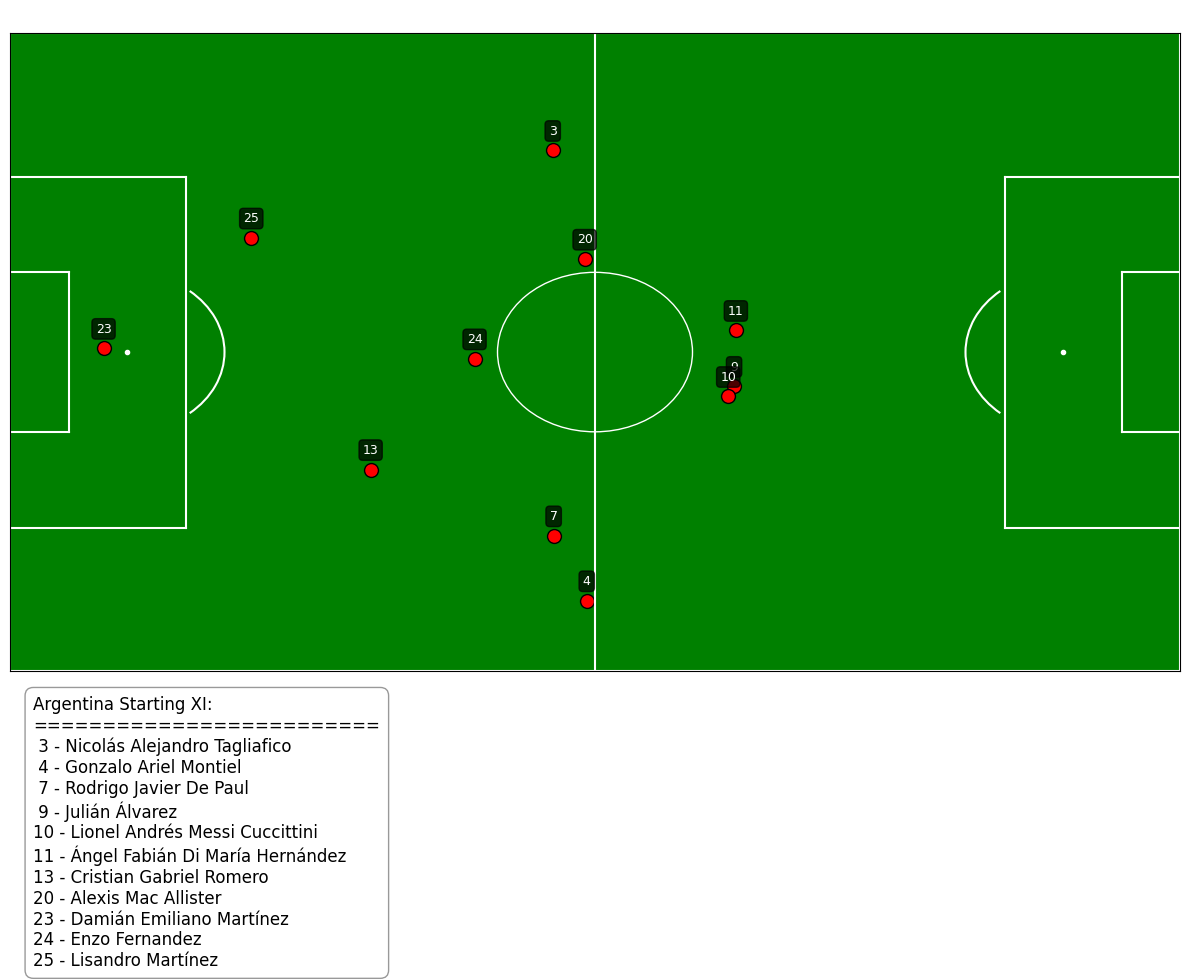

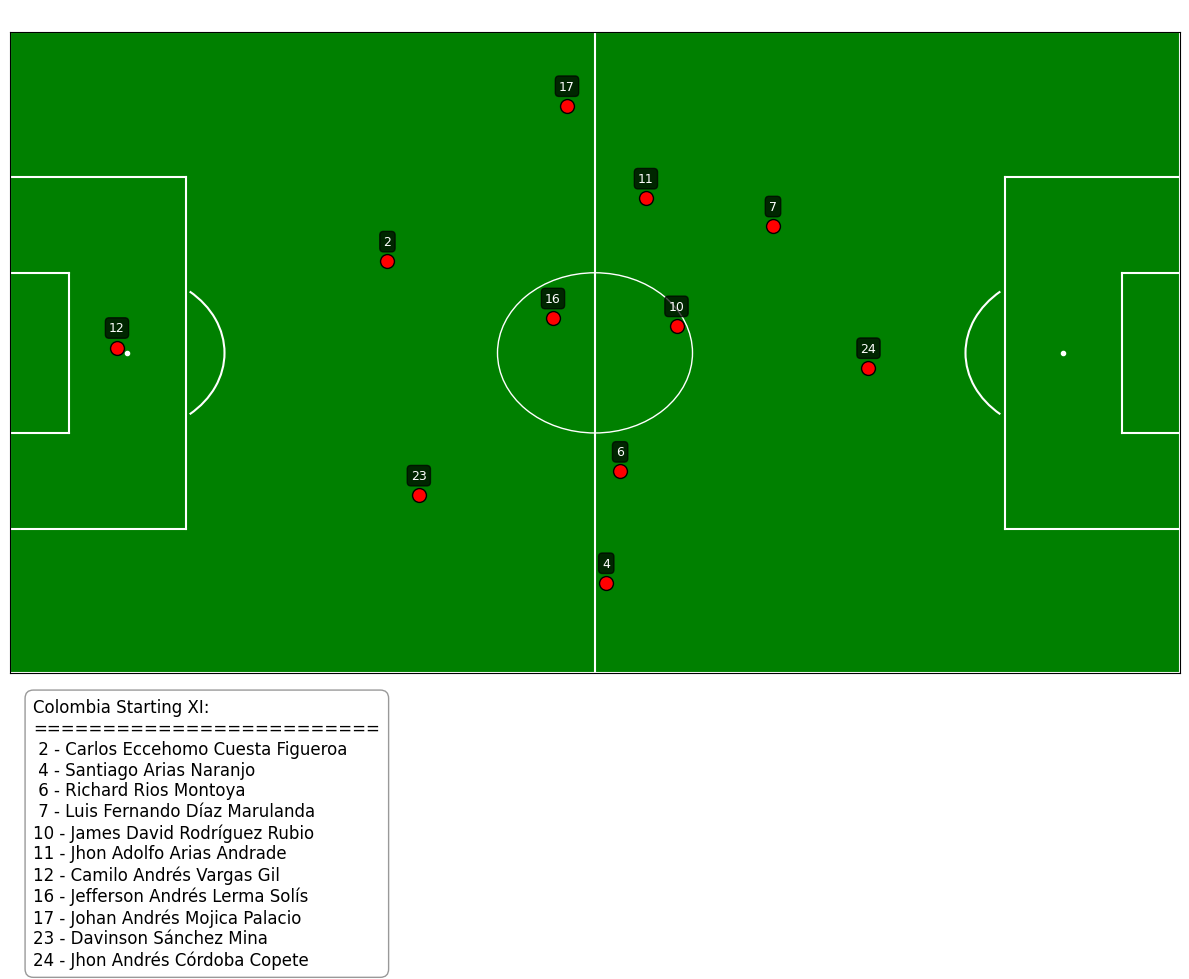

In [129]:
# Load events for the latest match
events_latest = sb.events(match_id=last_match_id)

# Extract the Starting XI for each team and build a map of player names to jersey numbers
home_jersey_map = build_xi_jersey_map(events_latest, home_team)
away_jersey_map = build_xi_jersey_map(events_latest, away_team)

# Filter for Starting XI players only
all_starters = set(home_jersey_map.keys()).union(away_jersey_map.keys())

# Filter events to only include the Starting XI players
events_latest_starters = events_latest[events_latest['player'].isin(all_starters)].copy()
    
# Add a new column for jersey number
events_latest_starters['jersey_number'] = events_latest_starters['player'].apply(get_jersey_number)

# Compute average positions for each player
home_events_latest = events_latest_starters[events_latest_starters['team'] == home_team]
away_events_latest = events_latest_starters[events_latest_starters['team'] == away_team]

home_avg_positions_latest = compute_average_positions(home_events_latest)
away_avg_positions_latest = compute_average_positions(away_events_latest)

# Plot for the home team
plot_team_with_lineup(home_avg_positions_latest, home_team, home_jersey_map)

# Plot for the away team
plot_team_with_lineup(away_avg_positions_latest, away_team, away_jersey_map)

# Step 5.2: First Match

Let's follow the same instructions of the previous step to do the same for the firstt match in the dataset

In [130]:
# Load the latest competition
comps = sb.competitions()

# Extract the numeric year from the 'season_name' (e.g. "2020/2021" -> "2020")
comps['season_year'] = comps['season_name'].str[:4].astype(int)

# Sort by year (ascending) so the top row is the older
comps_sorted = comps.sort_values(by='season_year', ascending=True).reset_index(drop=True)

# Pick the FIRST row in the sorted DF -> the OLDEST competition
latest_comp_row = comps_sorted.iloc[0]
cid = latest_comp_row['competition_id']
sid = latest_comp_row['season_id']

print("Latest competition by year:", latest_comp_row['competition_name'] + " " + latest_comp_row['season_name'])
print("Year (Season):", latest_comp_row['season_name'])
print("competition_id =", cid)
print("season_id =", sid)


Latest competition by year: FIFA World Cup 1958
Year (Season): 1958
competition_id = 43
season_id = 269


In [131]:
# Load matches for the latest competition
comp_matches = sb.matches(competition_id=cid, season_id=sid)

# Sort by match_date ascending
comp_matches = comp_matches.sort_values(by='match_date')

# Pick the first row => the most recent match date in that competition
first_match_id = comp_matches.iloc[0]['match_id']
print("Most oldest match_id in that competition:", first_match_id)

Most oldest match_id in that competition: 3888704


In [132]:
# Pick the first row => the oldest match
oldest_match = comp_matches.iloc[0]

# Extract date, teams, and scores
match_date  = oldest_match['match_date']
home_team   = oldest_match['home_team']
away_team   = oldest_match['away_team']
home_score  = oldest_match['home_score']
away_score  = oldest_match['away_score']

# Print a simple summary
print(f"[ID: {first_match_id}] 📅 {match_date} | ⚽ {home_team} - {away_team} {home_score}:{away_score}")

[ID: 3888704] 📅 1958-06-24 | ⚽ Brazil - France 5:2


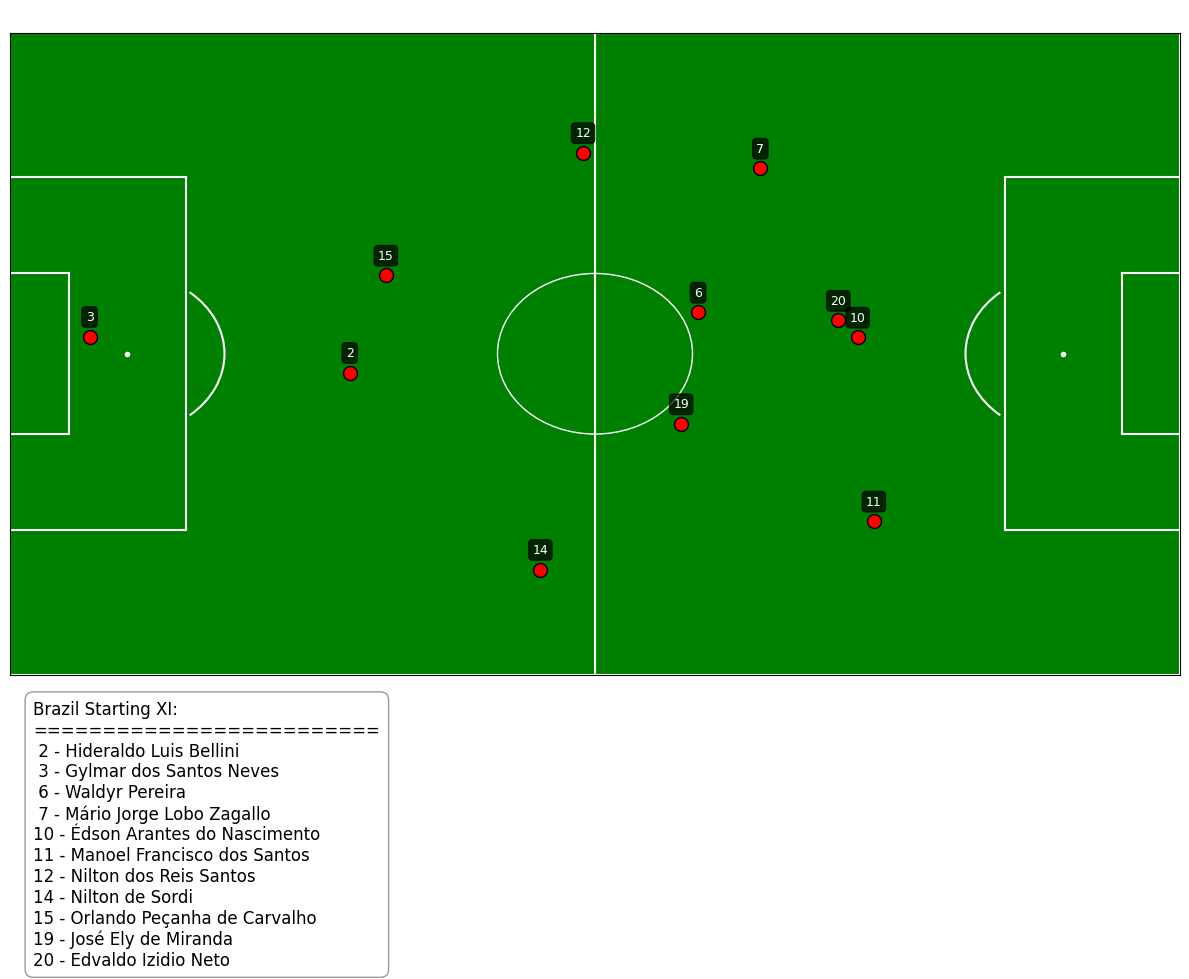

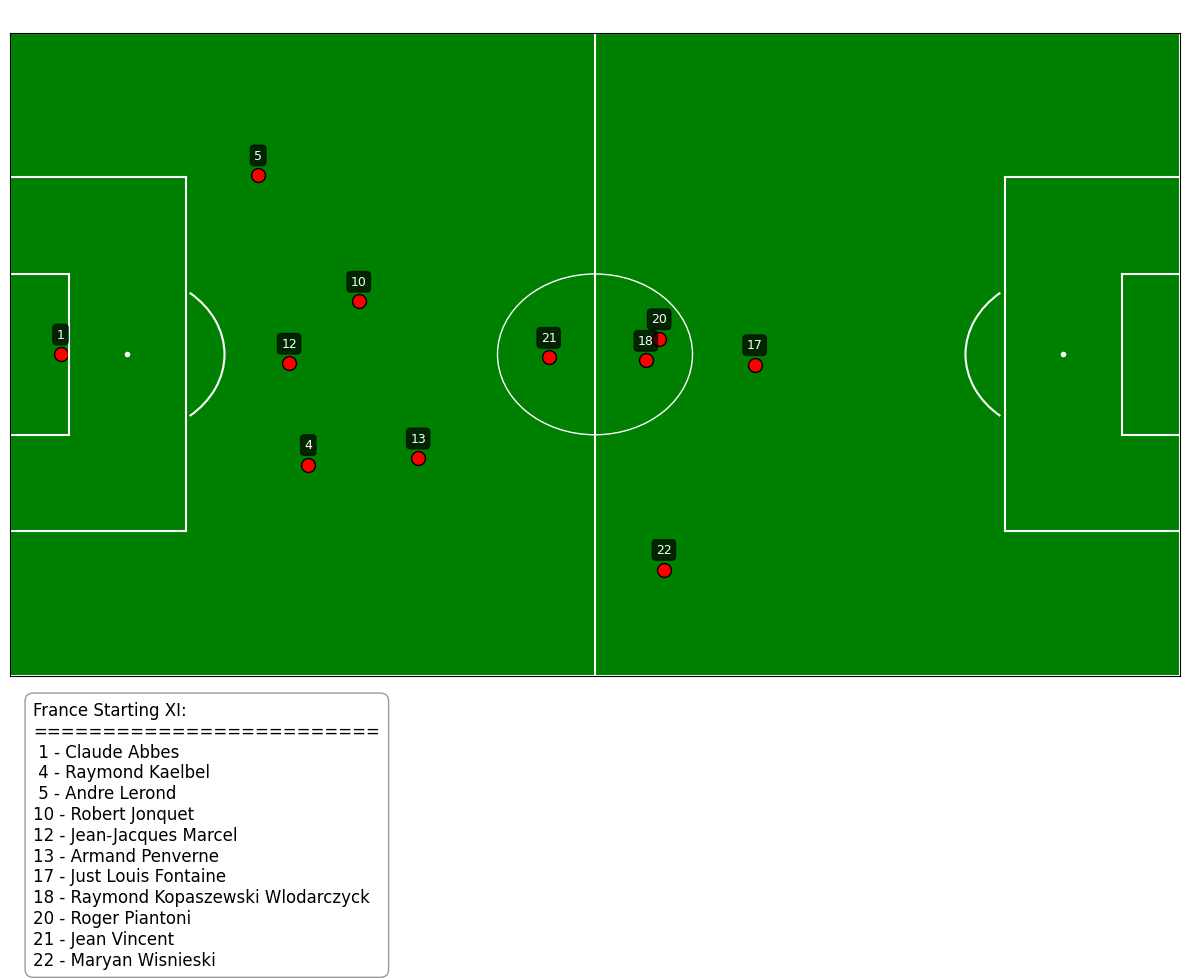

In [133]:
# Load events for the older match
events_older = sb.events(match_id=first_match_id)

# Extract the Starting XI for each team and build a map of player names to jersey numbers
home_jersey_map = build_xi_jersey_map(events_older, home_team)
away_jersey_map = build_xi_jersey_map(events_older, away_team)

# Filter for Starting XI players only
all_starters = set(home_jersey_map.keys()).union(away_jersey_map.keys())

# Filter events to only include the Starting XI players
events_older_starters = events_older[events_older['player'].isin(all_starters)].copy()
    
# Add a new column for jersey number
events_older_starters['jersey_number'] = events_older_starters['player'].apply(get_jersey_number)

# Compute average positions for each player
home_events_older = events_older_starters[events_older_starters['team'] == home_team]
away_events_older = events_older_starters[events_older_starters['team'] == away_team]

home_avg_positions_older= compute_average_positions(home_events_older)
away_avg_positions_older = compute_average_positions(away_events_older)

# Plot for the home team
plot_team_with_lineup(home_avg_positions_older, home_team, home_jersey_map)

# Plot for the away team
plot_team_with_lineup(away_avg_positions_older, away_team, away_jersey_map)

# Step 6: Match Events Analysis

## Step 6.1: Choose the Match and Retrieve the Linked Events

Let's retrieve all matches for a specific competition (Uefa Euro) and season (2024) from the dataset, sorted by date. Then let's select the third match (index 2) in that list and prints some basic information about the chosen game. These details include the match ID, competition name, stage, date, home and away teams, final score, stadium, and referee from the "chosen_match" object

In [134]:
competition_id = 55   # e.g., Euro 2024
season_id = 282       # 2024
all_matches = sb.matches(competition_id=competition_id, season_id=season_id)

# Sort by date just to see them in order
all_matches = all_matches.sort_values(by='match_date')

# Let’s pick a game at random (e.g., the 3rd match)
match_pos = 2
chosen_match = all_matches.iloc[match_pos]
match_id = chosen_match['match_id']

# Print out some basic info
print("Chosen Match ID:", match_id)
print("Competition:", all_matches['competition'][match_pos])
print("Stage:", chosen_match['competition_stage'])
print("Date:", chosen_match['match_date'])
print("Teams:", chosen_match['home_team'], "vs.", chosen_match['away_team'])
print("Score:", chosen_match['home_score'], "-", chosen_match['away_score'])
print("Stadium:", chosen_match['stadium'])
print("Referee", chosen_match['referee'])

Chosen Match ID: 3930161
Competition: Europe - UEFA Euro
Stage: Group Stage
Date: 2024-06-15
Teams: Italy vs. Albania
Score: 2 - 1
Stadium: Signal-Iduna-Park
Referee Felix Zwayer


The following cell uses the sb.events(...) function to retrieve all event data for the previously selected match and displays how many total events are in the dataset. It also shows the first rows, which provide a quick look at the structure of the event DataFrame. Each row represents a single on‐pitch action (e.g., pass, shot, foul) with various columns detailing the event’s type, location, timing, and associated players or teams.

In [ ]:
# Load events for the chosen match
events = sb.events(match_id=match_id)

print("Number of events:", events.shape[0])

events.head(10)

Number of events: 4066
Columns:
 ['50_50', 'bad_behaviour_card', 'ball_receipt_outcome', 'block_deflection', 'block_offensive', 'carry_end_location', 'clearance_aerial_won', 'clearance_body_part', 'clearance_head', 'clearance_left_foot', 'clearance_right_foot', 'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage', 'foul_committed_card', 'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_shot_saved_to_post', 'goalkeeper_technique', 'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain', 'interception_outcome', 'location', 'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_deflected', 'pass_end_location', 'pass_goal_assist', 'pass_height', 'pass_inswinging', 'pass_l

,50_50,bad_behaviour_card,ball_receipt_outcome,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Italy,914,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Albania,906,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Albania,906,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Italy,914,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Albania,906,00:00:00.000,Half Start,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Italy,914,00:00:00.000,Half Start,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Albania,906,00:00:00.863,Pass,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Albania,906,00:00:02.579,Pass,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Albania,906,00:00:04.984,Pass,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Italy,914,00:00:20.848,Pass,NaN


In [156]:
events.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_right_foot', 'counterpress',
       'dribble_nutmeg', 'dribble_outcome', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_shot_saved_to_post',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera', 'out',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_deflected',
       'pass_end_l

## Step 6.2: General Match Analysis

Here we extract the starting lineup information directly from the event data retrieved for the match. In the StatsBomb dataset, the event type "Starting XI" contains tactical lineup information for each team before kickoff. By filtering events[events['type'] == 'Starting XI'], it isolates the rows where the team’s starting formation is recorded. The tactics['lineup'] field within each "Starting XI" row holds a list of dictionaries, each representing a player in the lineup. The code then loops through this list, extracting and printing each player’s jersey number and full name under the corresponding team name.

In [185]:
# Filter for 'Starting XI' rows
starting_xi_rows = events[events['type'] == 'Starting XI']

for i, row in starting_xi_rows.iterrows():
    print("TEAM:", row['team'])
    lineup = row['tactics']['lineup']
    scheme = row['tactics']['formation']
    print("Scheme:", scheme)
    
    for pl in lineup:

        # Extract player name
        pinfo = pl['player']
        player_name = pinfo.get('name', 'Unknown')

        # Extract jersey number
        jersey = pl.get('jersey_number', '??')

        # Extract player position
        position = pl['position']
        pos = position.get('name', 'Unknown')
        print(f"    [{pos}] {jersey} - {player_name}")
    
    print(40*"-")

TEAM: Italy
Scheme: 433
    [Goalkeeper] 1 - Gianluigi Donnarumma
    [Right Back] 2 - Giovanni Di Lorenzo
    [Right Center Back] 23 - Alessandro Bastoni
    [Left Center Back] 5 - Riccardo Calafiori
    [Left Back] 3 - Federico Dimarco
    [Center Defensive Midfield] 8 - Jorge Luiz Frello Filho
    [Right Center Midfield] 7 - Davide Frattesi
    [Left Center Midfield] 18 - Nicolò Barella
    [Right Wing] 14 - Federico Chiesa
    [Left Wing] 10 - Lorenzo Pellegrini
    [Center Forward] 9 - Gianluca Scamacca
----------------------------------------
TEAM: Albania
Scheme: 4231
    [Goalkeeper] 23 - Thomas Strakosha
    [Right Back] 4 - Elseid Hysaj
    [Right Center Back] 5 - Arlind Afrim Ajeti
    [Left Center Back] 6 - Berat Djimsiti
    [Left Back] 3 - Mario Mitaj
    [Right Defensive Midfield] 20 - Ylber Ramadani
    [Left Defensive Midfield] 21 - Kristjan Asllani
    [Right Wing] 9 - Jasir Asani
    [Center Attacking Midfield] 10 - Nedim Bajrami
    [Left Wing] 15 - Taulant Sulejman

### Step 6.2.1: Passes Analysis

Here we analyze the passing events in the match, focusing on pass completion rates for both teams. As above, we first filters the events data to isolate only "Pass" events. Then, we classify passes as completed or incomplete based on whether pass_outcome is NaN (a missing outcome indicates success). The script calculates and prints total passes, the number of completed and incomplete passes, and the overall pass precision (completion percentage). It further breaks these stats down by team, showing total passes, completed passes, and pass completion percentage for each tean.

In [138]:
# Filter for 'Pass' events
passes = events[events['type'] == 'Pass'].copy()

# If 'pass_outcome' is NaN => pass was successful
completed_passes = passes[passes['pass_outcome'].isna()]
incomplete_passes = passes[~passes['pass_outcome'].isna()]

print("Total passes:", passes.shape[0])
print("  Completed:", completed_passes.shape[0])
print("  Incomplete:", incomplete_passes.shape[0])
print("  Precision:", round(completed_passes.shape[0] / passes.shape[0], 2))

# Passes by team
team_passes = passes.groupby('team').size()
team_completed = completed_passes.groupby('team').size()

print("\nPasses by team (total):\n", team_passes)
print("\nCompleted by team:\n", team_completed)

# Percentage of completed passes
team_pass_pct = (team_completed / team_passes)
print("\nCompletion % by team:\n", round(team_pass_pct,2))

Total passes: 1261
  Completed: 1124
  Incomplete: 137
  Precision: 0.89

Passes by team (total):
 team
Albania    406
Italy      855
dtype: int64

Completed by team:
 team
Albania    340
Italy      784
dtype: int64

Completion % by team:
 team
Albania    0.84
Italy      0.92
dtype: float64


### Step 6.2.2: Shots Analysis

Now, lwt's analyze the shot events from the match. First of all, we filter the events to keep only rows where the event type is "Shot", then counts how many shots each team took. Then, we calculate the total xG per team by summing the shot_statsbomb_xg values, which estimate the probability of each shot resulting in a goal based on historical data. Lastly, it identifies the top five players by shot count, providing insight into which individuals were most involved in taking attempts at goal. This breakdown helps assess team attacking efficiency and individual shooting contribution.

In [188]:
# Filter for 'Shot' events & summarize xG, who took the shots, etc.
shots = events[events['type'] == 'Shot'].copy()

# Shots per team
team_shot_count = shots['team'].value_counts()
print(f"Shots per team:\n {team_shot_count}")

# xG per team
shots['xg'] = shots['shot_statsbomb_xg']
team_xg = shots.groupby('team')['xg'].sum()
print(f"\nTotal xG by team:\n {team_xg}")

# Show top 5 shooters by number of shots
player_shots = shots['player'].value_counts().head(5)
print(f"\nTop 5 shooters (by shot count):\n {player_shots}")

Shots per team:
 team
Italy      17
Albania     8
Name: count, dtype: int64

Total xG by team:
 team
Albania    0.354597
Italy      1.449797
Name: xg, dtype: float64

Top 5 shooters (by shot count):
 player
Lorenzo Pellegrini    3
Federico Chiesa       3
Gianluca Scamacca     3
Jasir Asani           2
Federico Dimarco      2
Name: count, dtype: int64


Let's now visually represents the shot locations for both teams on a soccer pitch, distinguishing between home and away teams. As always, let's first identifies the home and away teams from the event data and filters for "Shot" events. Then splits the shots into two groups based on the team, printing the total number of shots each team took. The script extracts the (x, y) coordinates of each shot and plots them on a pitch using draw_pitch(ax=ax).

Italy shots: 17
Albania shots: 8


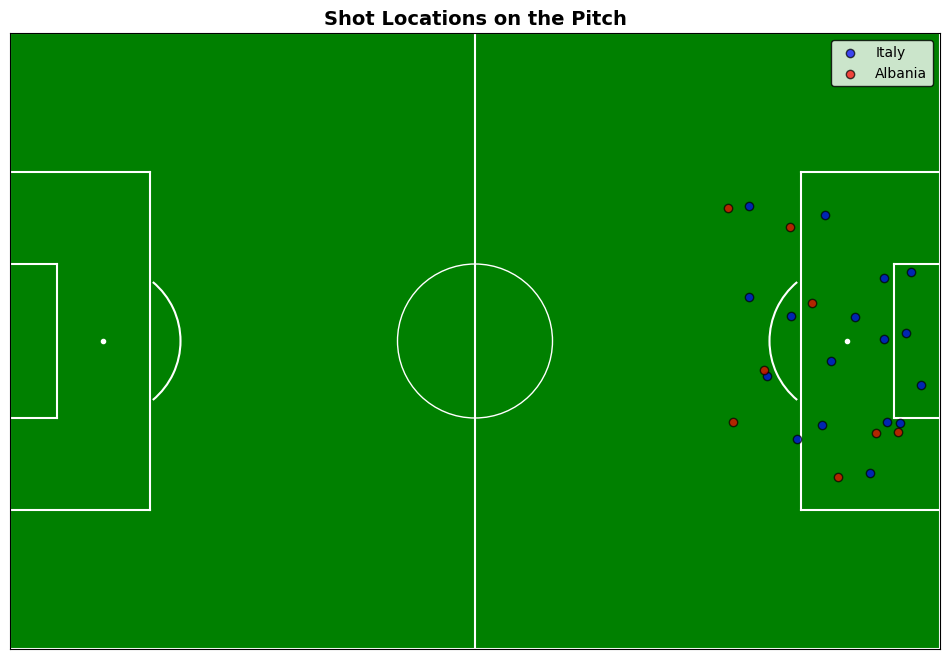

In [ ]:
# Identify home & away teams from the event data
home_team, away_team = events['team'].unique()

# Filter for Shot events
shots = events[events['type'] == 'Shot'].copy()

# Split the DataFrame by team
home_shots = shots[shots['team'] == home_team]
away_shots = shots[shots['team'] == away_team]

# Print how many shots each team had
print(f"{home_team} shots:", len(home_shots))
print(f"{away_team} shots:", len(away_shots))

# Extract x,y for home shots
home_shot_x = home_shots['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else np.nan)
home_shot_y = home_shots['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else np.nan)

# Extract x,y for away shots
away_shot_x = away_shots['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else np.nan)
away_shot_y = away_shots['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else np.nan)

# Create figure & draw the pitch
fig, ax = plt.subplots(figsize=(12,8))
draw_pitch(ax=ax)

# Scatter home shots in blue
ax.scatter(
    home_shot_x, home_shot_y, 
    c='blue', edgecolors='black', alpha=0.7,
    label=home_team, zorder=3                       # The zorder=3 ensures the dots appear above the pitch lines
)

# Scatter away shots in red
ax.scatter(
    away_shot_x, away_shot_y, 
    c='red', edgecolors='black', alpha=0.7,
    label=away_team, zorder=3
)

# Add a title, legend, and show
ax.set_title("Shot Locations on the Pitch", color="black", fontsize=14, fontweight='bold')
ax.legend(facecolor="white", edgecolor="black")
plt.show()

Here we visualizes shot locations on a soccer pitch, with each shot’s size scaled by expected goals (xG) and color-coded based on whether it resulted in a goal. Expected goals (xG) is a statistical model that estimates the probability of a shot resulting in a goal, based on various contextual factors like shot distance, angle, body part used, and defensive pressure. An xG value closer to 1.0 means a high probability of scoring (e.g., a tap-in from close range), while a low xG (e.g., 0.05) indicates a difficult attempt (e.g., a long-range shot under pressure).

The size of each marker is scaled, so high-xG chances appear larger on the pitch, while small circles represent low-probability shots. The color of each shot is set to gold for goals and dark gray for missed attempts.

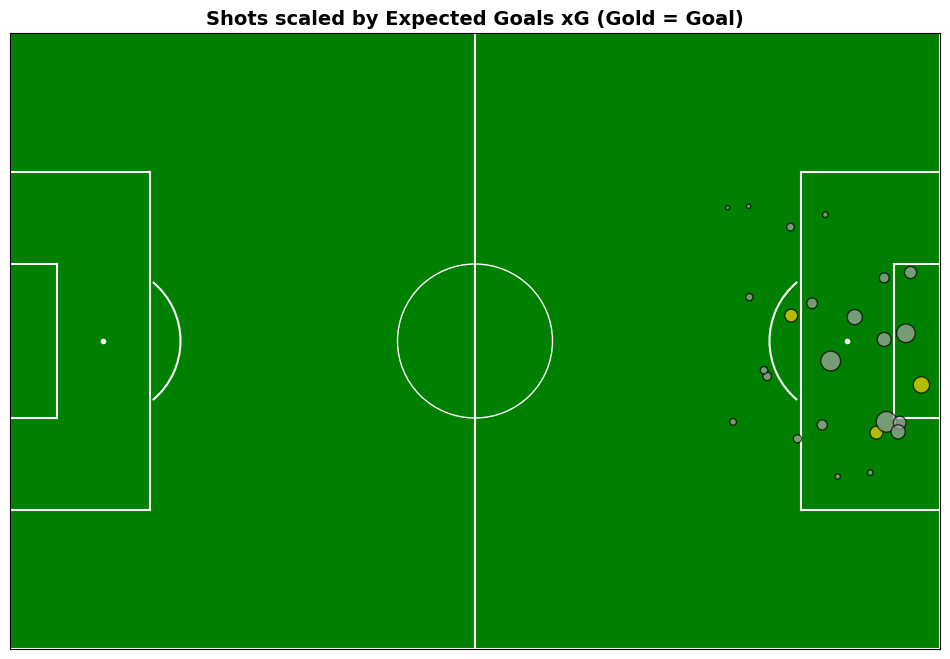

In [186]:
# Filter for Shot events
shots = events[events['type'] == 'Shot'].copy()

# Extract xG, location, outcome
shots['xg'] = shots['shot_statsbomb_xg']  # numeric float
shots['is_goal'] = shots['shot_outcome'] == "Goal"

# x,y for plotting
shots['x'] = shots['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else np.nan)
shots['y'] = shots['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else np.nan)

# Scale circle size by xG, e.g. multiply by 1000 for visibility
shots['marker_size'] = shots['xg'] * 1000

# Color-code: gold if goal, darkgray if not
shots['color'] = shots['is_goal'].map({True: 'gold', False: 'darkgray'})

# Create a figure and draw the pitch
fig, ax = plt.subplots(figsize=(12,8))
draw_pitch(ax=ax)
ax.set_title("Shots scaled by Expected Goals xG (Gold = Goal)", color="Black", fontsize=14, fontweight='bold')

# Scatter: each shot is a circle whose area ~ xG
ax.scatter(
    shots['x'], 
    shots['y'],
    s=shots['marker_size'],      # circle area (size)
    c=shots['color'],            # color
    alpha=0.7,
    edgecolors='black',
    linewidths=1.0,
    zorder=3
)

plt.show()

## Step 6.3: Player Analysis

This cell provides an overview of player involvement by counting different event types per player.

In [187]:
# Count the number of events per player
player_actions = events['player'].value_counts()

print("Total actions per player (all event types):")
print(player_actions.head(10))  # Show top 10 players by event count

Total actions per player (all event types):
player
Giovanni Di Lorenzo        393
Jorge Luiz Frello Filho    392
Nicolò Barella             342
Alessandro Bastoni         336
Riccardo Calafiori         324
Kristjan Asllani           182
Federico Dimarco           179
Berat Djimsiti             172
Federico Chiesa            154
Arlind Afrim Ajeti         149
Name: count, dtype: int64


### Step 6.3.1: Top Performers

This cell identifies the top three players in four categories: passes, shots, tackles, and dribbles. It first filters the event dataset for each action type (Pass, Shot, Duel, Dribble), counts how often each player performed that action, and retrieves their team name.
The function get_team(player_name) extracts the player’s team from the event data. Each ranking is stored as a DataFrame.

In [204]:
# Function to retrieve a player's team
def get_team(player_name):
    team = events[events['player'] == player_name]['team'].unique()
    return team[0] if len(team) > 0 else "Unknown"

# Extract top performers for each action type
top_passers = events[events['type'] == 'Pass']['player'].value_counts().head(3)
top_shooters = events[events['type'] == 'Shot']['player'].value_counts().head(3)
top_tacklers = events[events['type'] == 'Duel']['player'].value_counts().head(3)
top_dribblers = events[events['type'] == 'Dribble']['player'].value_counts().head(3)

# Convert to DataFrame and add team information
def create_leaderboard(series, action_name):
    df = pd.DataFrame({'Player': series.index, action_name: series.values})
    df['Team'] = df['Player'].apply(get_team)
    return df

# Generate tables for each category
top_passers_df = create_leaderboard(top_passers, 'Passes')
top_shooters_df = create_leaderboard(top_shooters, 'Shots')
top_tacklers_df = create_leaderboard(top_tacklers, 'Duels')
top_dribblers_df = create_leaderboard(top_dribblers, 'Dribbles')

# Display the top performers for each category
print("Top Passers:")
display(top_passers_df)

print("\nTop Shooters:")
display(top_shooters_df)

print("\nTop Tacklers:")
display(top_tacklers_df)

print("\nTop Dribblers:")
display(top_dribblers_df)

Top Passers:


,Player,Passes,Team
0,Jorge Luiz Frello Filho,131,Italy
1,Giovanni Di Lorenzo,131,Italy
2,Alessandro Bastoni,115,Italy



Top Shooters:


,Player,Shots,Team
0,Lorenzo Pellegrini,3,Italy
1,Federico Chiesa,3,Italy
2,Gianluca Scamacca,3,Italy



Top Tacklers:


,Player,Duels,Team
0,Armando Broja,4,Albania
1,Giovanni Di Lorenzo,3,Italy
2,Mateo Retegui,3,Italy



Top Dribblers:


,Player,Dribbles,Team
0,Federico Chiesa,6,Italy
1,Armando Broja,1,Albania
2,Nicolò Barella,1,Italy


### Step 6.3.2: Passes Analysis

Here we analyze the successful passes in the match, focusing on pass direction (forward, sideways, or backward) by filtering only completed passes, calculating the pass angle, and categorizing each pass based on its trajectory. Finally, we counts how many passes each player made in each direction and presents the results in a DataFrame.

In [ ]:
# Filter successful passes
successful_passes = events[(events['type'] == 'Pass') & (events['pass_outcome'].isna())].copy()

# Calculate pass direction (forward, backward, sideways)
# Uses np.arctan2(y_change, x_change) to calculate the direction of the pass based on its start and end location using the radiants as the angle unit
# if the angle is between -pi/4 and pi/4, the pass is forward
# if the angle is between pi/4 and 3pi/4 or -3pi/4 and -pi/4, the pass is sideways
# otherwise, the pass is backward
successful_passes['pass_angle'] = np.arctan2(
    successful_passes['pass_end_location'].apply(lambda loc: loc[1] if isinstance(loc, list) else np.nan) - 
    successful_passes['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else np.nan),
    successful_passes['pass_end_location'].apply(lambda loc: loc[0] if isinstance(loc, list) else np.nan) - 
    successful_passes['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else np.nan)
)

# Define direction categories
def categorize_pass(angle):
    if -np.pi/4 <= angle <= np.pi/4:
        return "Forward"
    elif np.pi/4 < angle <= 3*np.pi/4 or -3*np.pi/4 <= angle < -np.pi/4:
        return "Sideways"
    else:
        return "Backward"

successful_passes['pass_direction'] = successful_passes['pass_angle'].apply(categorize_pass)

# Count passes by direction for each player
pass_directions = successful_passes.groupby(['team', 'player', 'pass_direction']).size().unstack(fill_value=0).reset_index()

# Display results
print("Passes by direction for each player:")
display(
    pass_directions.sort_values(by='Forward', ascending=False)
)

Passes by direction for each player:


pass_direction,team,player,Backward,Forward,Sideways
23,Italy,Giovanni Di Lorenzo,15,34,74
15,Italy,Alessandro Bastoni,13,23,75
29,Italy,Riccardo Calafiori,4,23,74
24,Italy,Jorge Luiz Frello Filho,21,21,78
28,Italy,Nicolò Barella,17,18,70
8,Albania,Mario Mitaj,12,17,15
4,Albania,Elseid Hysaj,10,10,11
22,Italy,Gianluigi Donnarumma,0,9,9
1,Albania,Arlind Afrim Ajeti,1,8,37
14,Albania,Ylber Ramadani,5,8,26


### Step 6.3.3: Dribble and Carry Analysis

This cell evaluates dribbling performance, identifying which players attempt the most dribbles and how successful they are. It first filters all dribble events, then separates them into successful and unsuccessful attempts based on the "dribble_outcome" column. The code then computes dribble attempts, successful dribbles, and success rate (%) for each player, highlighting the top dribblers.

In [ ]:
# Filter dribble events
dribbles = events[events['type'] == 'Dribble'].copy()

# Separate successful and unsuccessful dribbles
successful_dribbles = dribbles[dribbles['dribble_outcome'] == 'Complete']
unsuccessful_dribbles = dribbles[dribbles['dribble_outcome'] == 'Incomplete']

# Count dribble attempts & successful dribbles per player
dribble_stats = dribbles.groupby(['team', 'player']).size().to_frame('Attempts')
dribble_stats['Successful'] = successful_dribbles.groupby(['team', 'player']).size()
dribble_stats['Successful'] = dribble_stats['Successful'].fillna(0).astype(int)  # Fill NaN for players without successful dribbles
dribble_stats['Success %'] = (dribble_stats['Successful'] / dribble_stats['Attempts']) * 100

# Sort by most successful dribbles and display top 10 players
dribble_stats = dribble_stats.sort_values(by='Success %', ascending=False)
print("Dribble stats for each player:")
display(dribble_stats)

Dribble stats for each player:


Attempts  Successful  Success %
team    player                                          
Italy   Federico Chiesa         6           5  83.333333
Albania Armando Broja           1           0   0.000000
Italy   Davide Frattesi         1           0   0.000000
        Matteo Darmian          1           0   0.000000
        Nicolò Barella          1           0   0.000000

Now let's analyze the progressive runs, by identifying players who carry the ball forward the most during a match. We extract “Carry” events from the dataset, calculates the distance covered in each run using the euclidean distance, and highlights the top ball carriers by total progressive distance. 

In [223]:
# Filter Carry (Ball Progression) events
carries = events[events['type'] == 'Carry'].copy()

# Compute Carry Distance
carries['carry_distance'] = carries.apply(lambda row: 
    np.sqrt((row['carry_end_location'][0] - row['location'][0])**2 + 
            (row['carry_end_location'][1] - row['location'][1])**2)
    if isinstance(row['carry_end_location'], list) and isinstance(row['location'], list) else np.nan, axis=1)

# Sum total carry distance per player
carry_stats = carries.groupby(['team', 'player'])['carry_distance'].sum().reset_index()
carry_stats.columns = ['Team', 'Player', 'Total Carry Distance (m)']

# Sort by the most progressive players
top_carriers = round(carry_stats.sort_values('Total Carry Distance (m)', ascending=False),2)

# Display results
print("Total Carry Distance for each player:")
display(top_carriers.head(10))

Total Carry Distance for each player:


,Team,Player,Total Carry Distance (m)
29,Italy,Riccardo Calafiori,524.81
15,Italy,Alessandro Bastoni,523.11
28,Italy,Nicolò Barella,480.25
23,Italy,Giovanni Di Lorenzo,312.14
24,Italy,Jorge Luiz Frello Filho,283.79
7,Albania,Kristjan Asllani,273.43
25,Italy,Lorenzo Pellegrini,260.60
19,Italy,Federico Chiesa,227.07
14,Albania,Ylber Ramadani,199.88
18,Italy,Davide Frattesi,156.33


### Step 6.3.4: Defensive Analysis

this visualization isolates the single most active defensive player and highlights where they perform tackles, interceptions, and blocks on the pitch by selecting this events in the events object

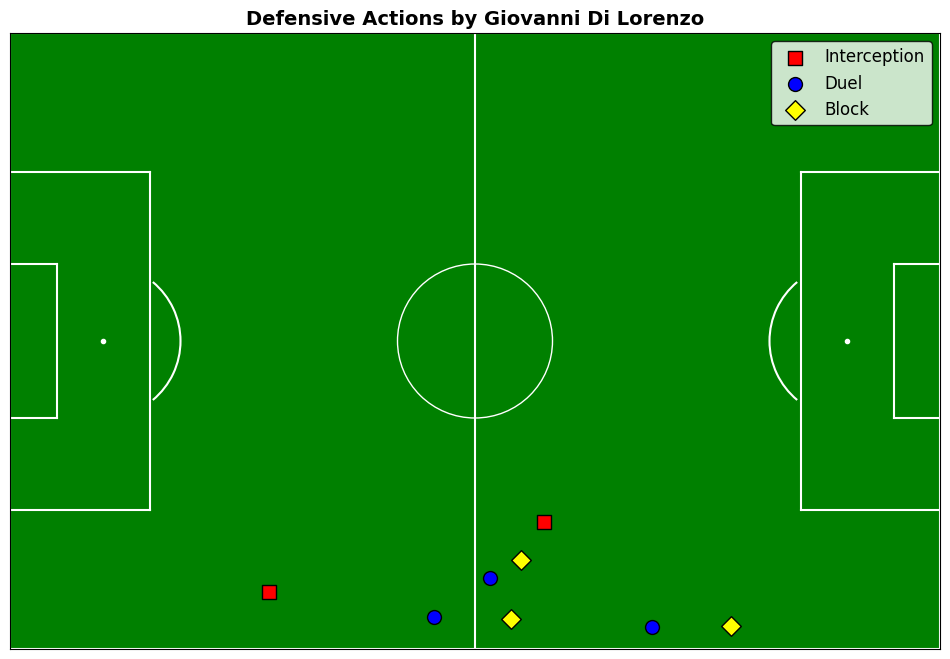

In [245]:
import matplotlib.pyplot as plt

# Filter Defensive Events
defensive_actions = events[events['type'].isin(["Interception", "Duel", "Block"])].copy()

# Identify the Most Active Defensive Player
top_defender = defensive_actions['player'].value_counts().idxmax()
player_defensive_actions = defensive_actions[defensive_actions['player'] == top_defender]

# Create the pitch
fig, ax = plt.subplots(figsize=(12,8))
draw_pitch(ax=ax)
ax.set_title(f"Defensive Actions by {top_defender}", color="black", fontsize=14, fontweight='bold')

# Plot Different Defensive Actions with Unique Markers
for action, marker, color in zip(["Interception", "Duel", "Block"], ["s", "o", "D"], ["red", "blue", "yellow"]):
    action_events = player_defensive_actions[player_defensive_actions['type'] == action]
    x = action_events['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else np.nan)
    y = action_events['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else np.nan)
    
    ax.scatter(x, y, c=color, label=action, marker=marker, edgecolors="black", zorder = 3, s=100)

# Add a legend and show the plot
ax.legend(facecolor="white", edgecolor="black", fontsize=12, loc="upper right")
plt.show()

## Step 6.4: Further Analysis

### Step 6.4.1: Team Defensive Pressing Intensity Heatmap

This visualization will show where a team applies the most defensive pressure, based on:
	•	Duel events (tackles & challenges).
	•	Interceptions (reading passing lanes).
	•	Ball recoveries (winning possession).
This will directly align with real-time tactical insights, showing where a team is pressing high, staying compact, or struggling defensively

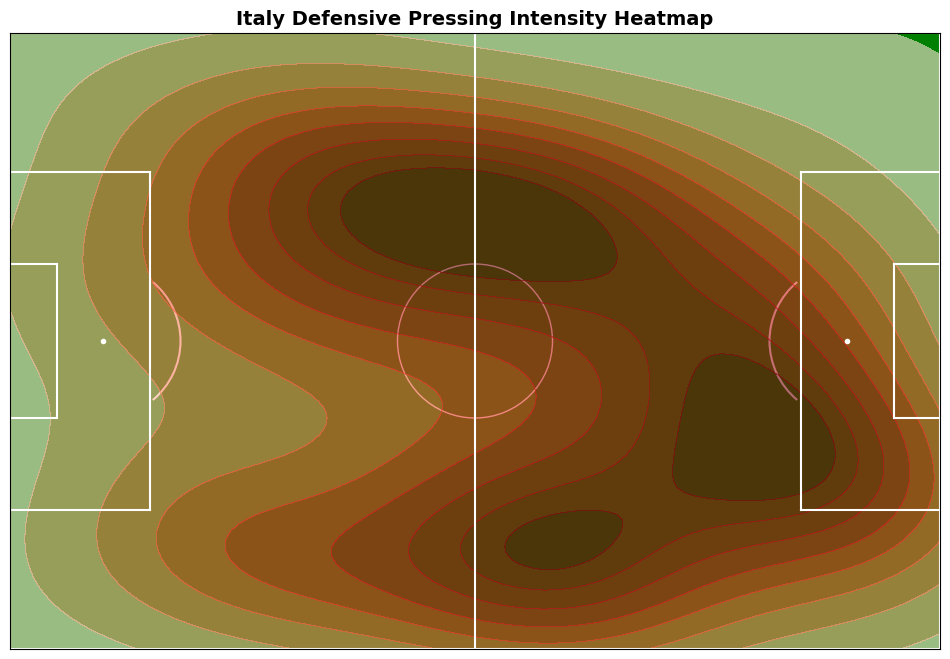

In [250]:
# Filter Defensive Actions for a Specific Team
team_defensive_actions = events[(events['team'] == home_team) & 
                                (events['type'].isin(["Interception", "Duel", "Ball Recovery"]))]

# Extract x,y locations
x_def = team_defensive_actions['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else np.nan)
y_def = team_defensive_actions['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else np.nan)

# Create Pitch & Heatmap
fig, ax = plt.subplots(figsize=(12,8))
draw_pitch(ax=ax)

# Heatmap overlay
sns.kdeplot(x=x_def, y=y_def, cmap="Reds", fill=True, alpha=0.6, ax=ax)

ax.set_title(f"{home_team} Defensive Pressing Intensity Heatmap", color="black", fontsize=14, fontweight='bold')
plt.show()

### Step 6.4.2: Shot Intensity Heatmap (Danger Zones)

The Shot Intensity Heatmap is a visualization that helps teams to identify shooting patterns & weaknesses. It is used in AI models to predict goal-scoring probabilities.

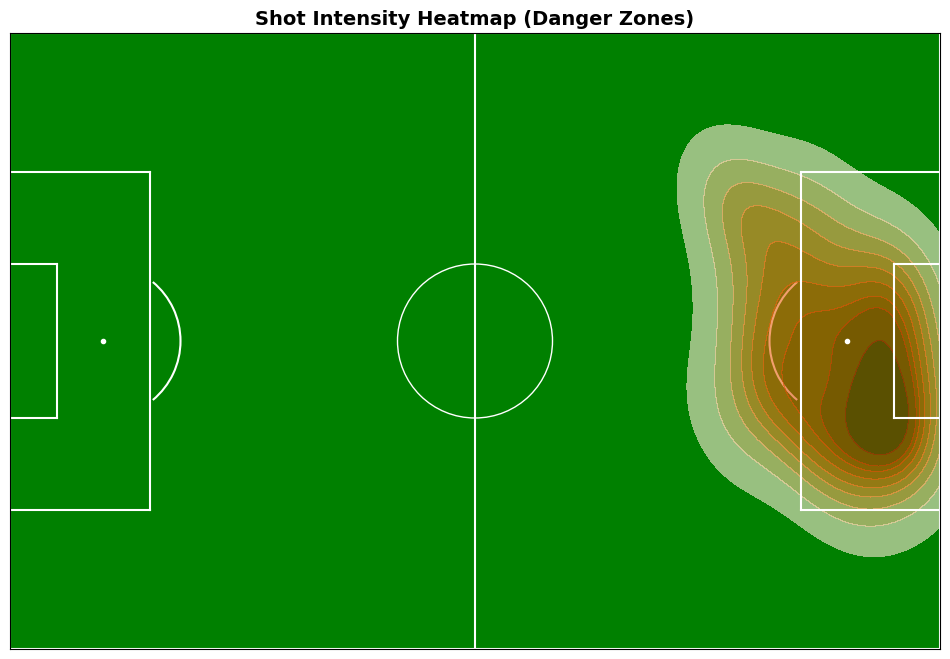

In [256]:
# Filter Shot Events
shots = events[events['type'] == 'Shot']

# Extract shot locations
x_shots = shots['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else np.nan)
y_shots = shots['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else np.nan)

# Create Pitch & Heatmap
fig, ax = plt.subplots(figsize=(12,8))
draw_pitch(ax=ax)

# Overlay the heatmap for shot intensity
sns.kdeplot(x=x_shots, y=y_shots, cmap="Oranges", fill=True, alpha=0.6, ax=ax)

ax.set_title("Shot Intensity Heatmap (Danger Zones)", color="black", fontsize=14, fontweight='bold')
plt.show()

### Step 6.4.3: Player Pressing Intensity Heatmap (Defensive Action)

This heatmap visualizes where a randomly selected player applies defensive pressure during the match. It highlights locations of interceptions, duels, and ball recoveries, helping identify whether the player is involved in high pressing, midfield ball-winning, or defensive blocks.

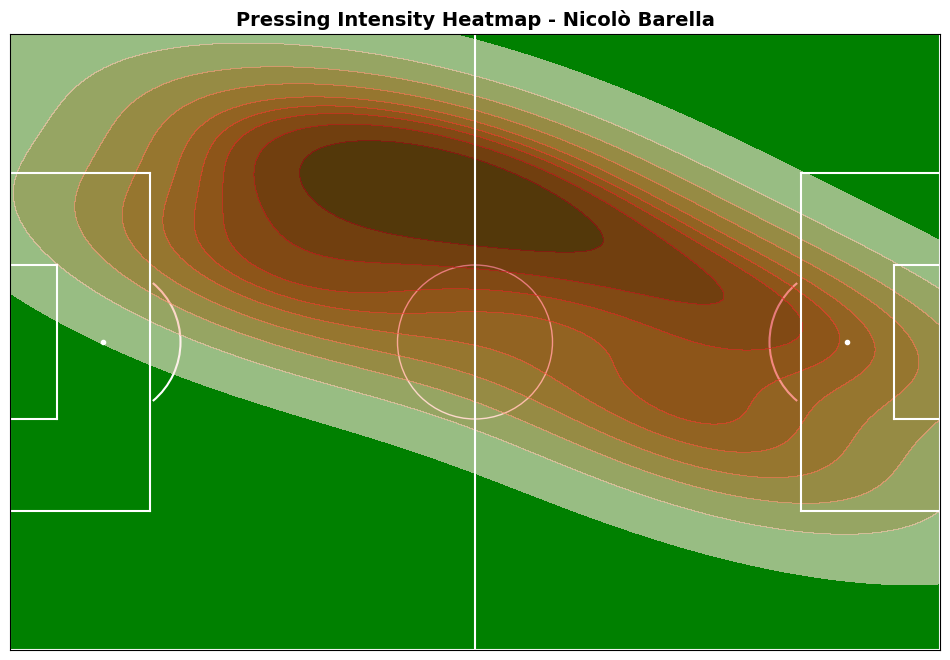

In [272]:
# Select a Random Player from the Match
players_in_match = events['player'].dropna().unique()
random_player = random.choice(players_in_match)

# Filter Defensive Actions for the Player
player_defensive_actions = events[(events['player'] == random_player) & 
                                  (events['type'].isin(["Interception", "Duel", "Ball Recovery"]))]

# Extract x, y locations
x_def = player_defensive_actions['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else np.nan)
y_def = player_defensive_actions['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else np.nan)

# Create Pitch & Heatmap for Pressing Intensity
fig, ax = plt.subplots(figsize=(12,8))
draw_pitch(ax=ax)
sns.kdeplot(x=x_def, y=y_def, cmap="Reds", fill=True, alpha=0.6, ax=ax)
ax.set_title(f"Pressing Intensity Heatmap - {random_player}", color="black", fontsize=14, fontweight='bold')
plt.show()

### Step 6.4.4: Player Movement Heatmap

This heatmap illustrates the movement and positioning of a randomly selected player throughout the match. It shows where the player is most active, helping to understand their positional tendencies, involvement in buildup play, and tactical role.

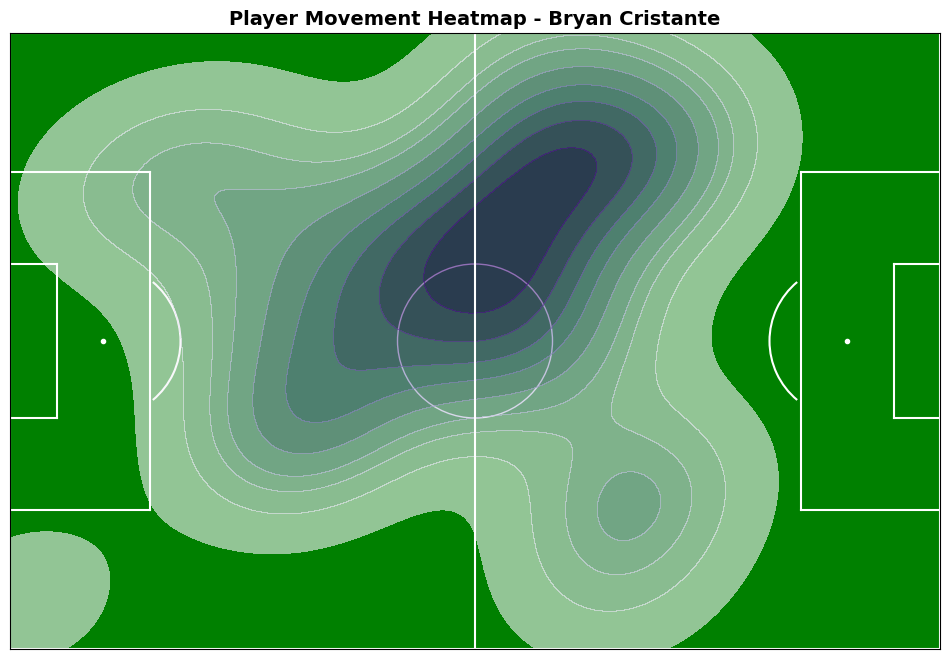

In [268]:
# Select a Random Player from the Match
players_in_match = events['player'].dropna().unique()
random_player = random.choice(players_in_match)

# Filter all actions by the Player
player_actions = events[events['player'] == random_player]

# Extract x, y locations
x_movement = player_actions['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else np.nan)
y_movement = player_actions['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else np.nan)

# Create Pitch & Heatmap for Player Movement
fig, ax = plt.subplots(figsize=(12,8))
draw_pitch(ax=ax)
sns.kdeplot(x=x_movement, y=y_movement, cmap="Purples", fill=True, alpha=0.6, ax=ax)
ax.set_title(f"Player Movement Heatmap - {random_player}", color="black", fontsize=14, fontweight='bold')
plt.show()